In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import recall_score # 召回率计算
from sklearn.metrics import classification_report

d:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
d:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [43]:
df = pd.read_excel('D:/data2.0.xlsx')

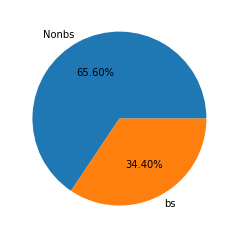

In [44]:
# 为确保绘制的饼图为圆形，需执行如下代码
plt.axes(aspect = 'equal')
# 统计位点是否为结合位点的频数
counts = df.BS.value_counts()
# 绘制饼图
plt.pie(x = counts, # 绘图数据
        labels=pd.Series(counts.index).map({0:'Nonbs',1:'bs'}), # 添加文字标签
        autopct='%.2f%%' # 设置百分比的格式，这里保留一位小数
       )
# 显示图形
plt.show()

In [48]:
# 将数据拆分为训练集和测试集
X = df.drop(['BS'], axis = 1)
y = df.BS
# 数据拆分
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.5, random_state = 1234)
# 导入第三方包
from imblearn.over_sampling import SMOTE

# 运用SMOTE算法实现训练数据集的平衡
over_samples = SMOTE(random_state=1234) 
over_samples_X,over_samples_y = over_samples.fit_sample(X_train, y_train)
#over_samples_X, over_samples_y = over_samples.fit_sample(X_train.values,y_train.values.ravel())
# 重抽样前的类别比例
print(y_train.value_counts()/len(y_train))
# 重抽样后的类别比例
print(pd.Series(over_samples_y).value_counts()/len(over_samples_y))

0    0.643272
1    0.356728
Name: BS, dtype: float64
1    0.5
0    0.5
dtype: float64


In [83]:
xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=0.5,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.9,
 reg_alpha=0.001,
reg_lambda=0.5,
 objective= 'binary:logistic',
 nthread=4,
 seed=27)

In [84]:
xgb1.fit(over_samples_X,over_samples_y)

resample_pred=xgb1.predict(np.array(X_test))

print('模型的准确率为：\n',metrics.accuracy_score(y_test,resample_pred))
print('模型的评估报告:\n',metrics.classification_report(y_test,resample_pred))


模型的准确率为：
 0.8001054852320675
模型的评估报告:
              precision    recall  f1-score   support

          0       0.86      0.84      0.85      1268
          1       0.69      0.73      0.71       628

avg / total       0.80      0.80      0.80      1896



d:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
